In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

In [88]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [111]:
class K_means:
    def __init__(self,K = 3,max_iters = 100, plot_steps = False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        self.clusters = [[] for _ in range(self.K) ]
        self.centroids = []
    
    def predict(self,X):
        self.X = X 
        self.n_samples,self.n_features = X.shape
        
        random_centroids_idxs = np.random.choice(self.n_samples,self.K,replace=False)
        self.centroids = [self.X[idx] for idx in random_centroids_idxs]
        #optimization
        for _ in range(self.max_iters):
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()
            #update centroids
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            if self.plot_steps:
                self.plot()
            #check if converged
            if self._is_converged(centroids_old,self.centroids):
                break
        #return cluster labels
        return self._get_cluster_labels(self.clusters)
    
    def _get_cluster_labels(self,clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx , cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels
        
    def _create_clusters(self,centroids):
        clusters = [[] for _ in range(self.K)]
        for idx,sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample,centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    def _closest_centroid(self,sample,centroids):
        distances = [euclidean_distance(sample,center) for center in centroids]
        min_cluster_idx = np.argmin(distances)
        return min_cluster_idx
    
    def _get_centroids(self,clusters):
        centroids = np.zeros((self.K,self.n_features))
        #print(centroids.shape)
        for idx,cluster in enumerate(clusters):
            cluster_mean = np.mean(X[cluster],axis = 0)
            centroids[idx] = cluster_mean
        return centroids
    
    def _is_converged(self,centeroids_old,centroids):
        distances = [euclidean_distance(centeroids_old[i],centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
    
    def plot(self):
        fig,ax = plt.subplots(figsize=(12,8))
        for i,index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point,marker='x',color = 'black',linewidth = 2)
        plt.show()
        

In [112]:
X,y = make_blobs(centers = 3, n_samples = 500, n_features = 2, shuffle=True)
print(X.shape)

(500, 2)


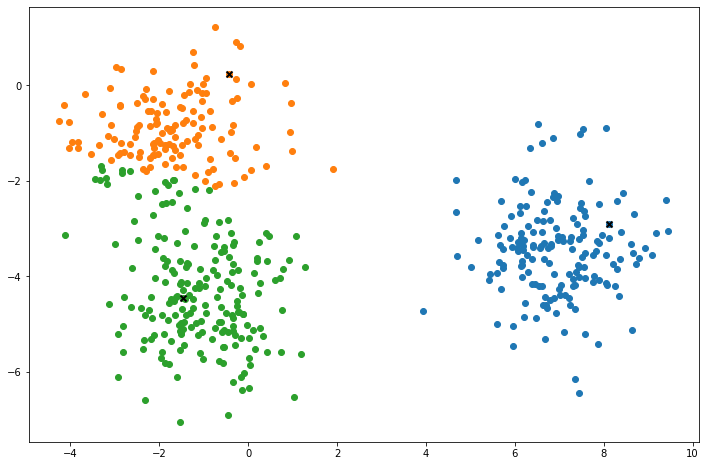

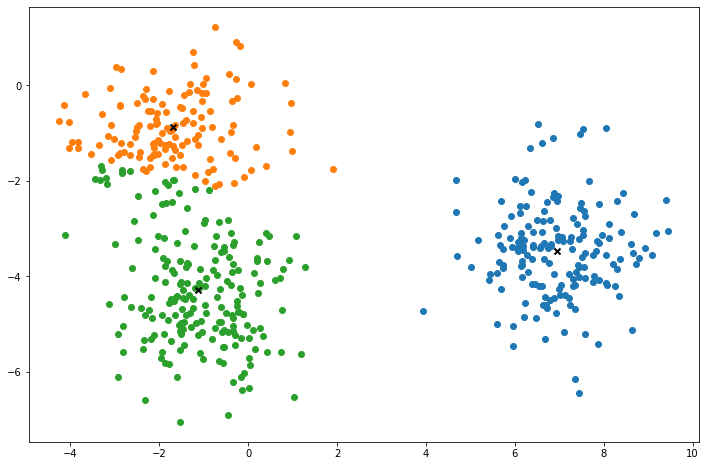

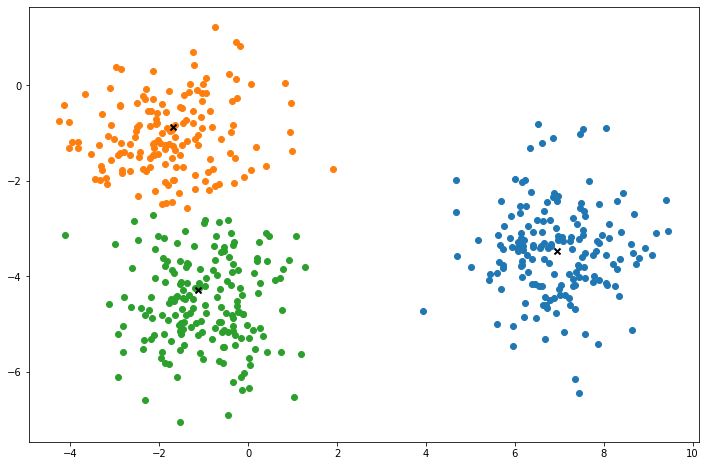

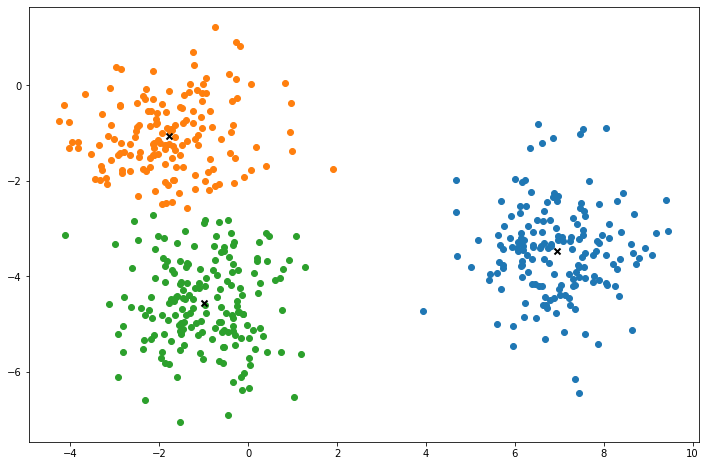

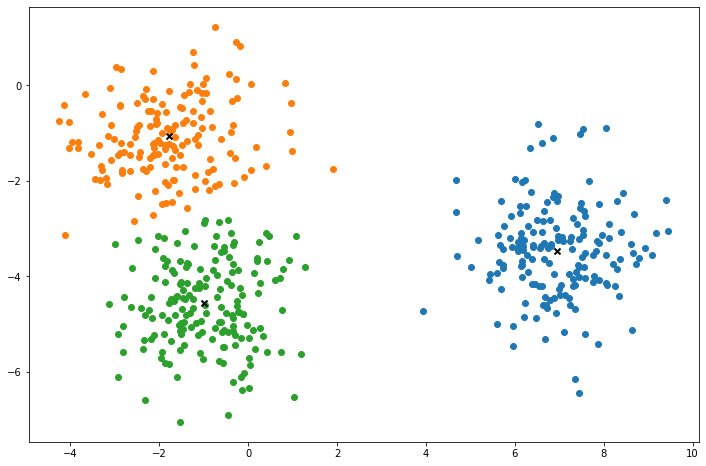

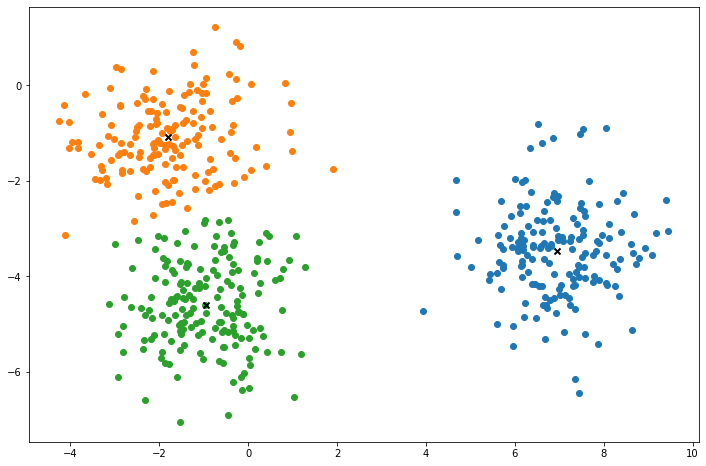

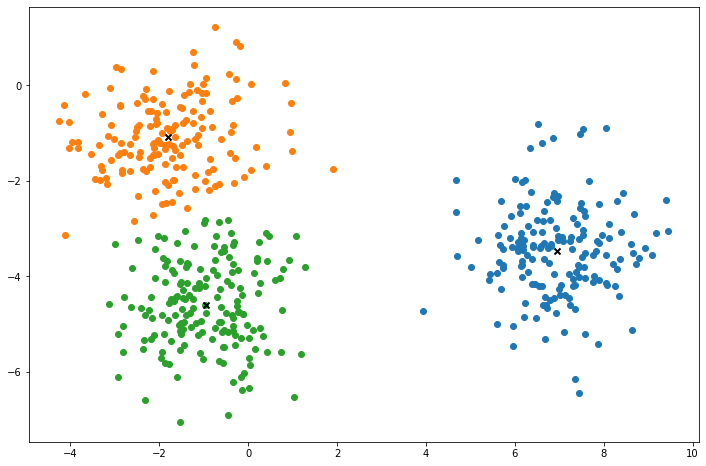

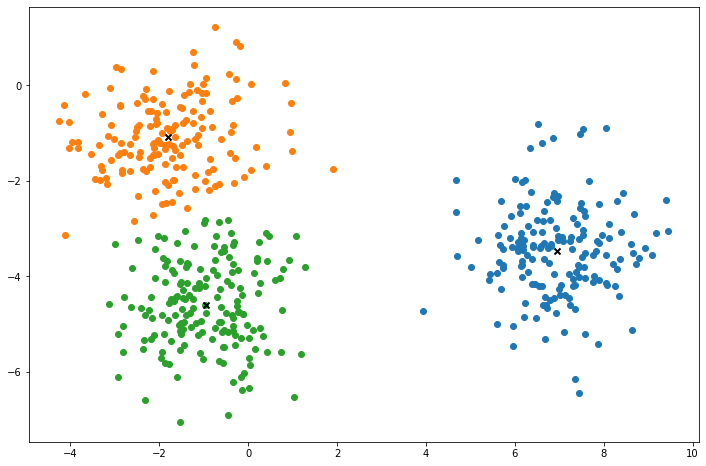

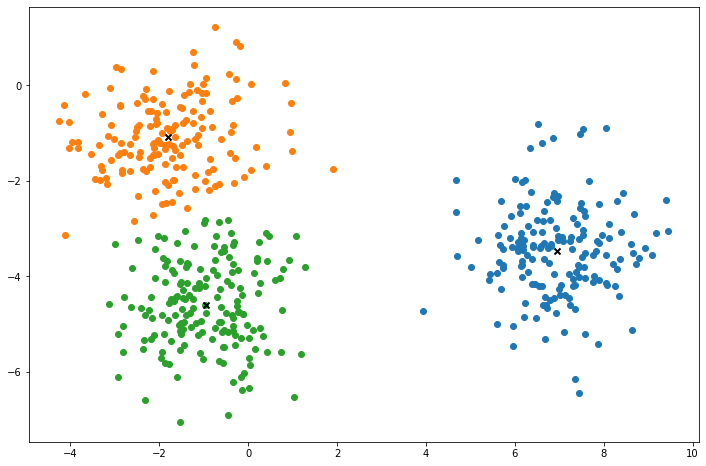

In [113]:
num_clusters = len(np.unique(y))
k = K_means(num_clusters,150,True)
k.predict(X);
k.plot()
